<a href="https://colab.research.google.com/github/saiharishs/AI-ML-SEM2/blob/main/Mushroom_Classification_ANN_21023211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom classification (Using ANN)

# Importing Dataset and Libraries

In [58]:
# importing lib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
df = pd.read_csv('../content/drive/MyDrive/input/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Feature Engineering

In [60]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [62]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [35]:
#unique for object data type
for col in df.columns:
    print(col, " : ", df[col].unique())

class  :  ['p' 'e']
cap-shape  :  ['x' 'b' 's' 'f' 'k' 'c']
cap-surface  :  ['s' 'y' 'f' 'g']
cap-color  :  ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises  :  ['t' 'f']
odor  :  ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment  :  ['f' 'a']
gill-spacing  :  ['c' 'w']
gill-size  :  ['n' 'b']
gill-color  :  ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape  :  ['e' 't']
stalk-root  :  ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring  :  ['s' 'f' 'k' 'y']
stalk-surface-below-ring  :  ['s' 'f' 'y' 'k']
stalk-color-above-ring  :  ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring  :  ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type  :  ['p']
veil-color  :  ['w' 'n' 'o' 'y']
ring-number  :  ['o' 't' 'n']
ring-type  :  ['p' 'e' 'l' 'f' 'n']
spore-print-color  :  ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population  :  ['s' 'n' 'a' 'v' 'y' 'c']
habitat  :  ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [36]:
from sklearn.preprocessing import LabelEncoder
def label_encoding(c):
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])
    df[c].unique()
for col in df.columns:
    label_encoding(col)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Feature Selection

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [38]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [39]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [40]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [41]:
featureScores

,Specs,Score
0,cap-shape,17.508364
1,cap-surface,214.068544
2,cap-color,11.511382
3,bruises,1194.277352
4,odor,75.910163
5,gill-attachment,3.505447
6,gill-spacing,826.795274
7,gill-size,1636.606833
8,gill-color,5957.764469
9,stalk-shape,36.594105


In [42]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                       Specs        Score
8                 gill-color  5957.764469
18                 ring-type  1950.610146
7                  gill-size  1636.606833
3                    bruises  1194.277352
10                stalk-root  1186.029221
6               gill-spacing   826.795274
21                   habitat   751.309489
19         spore-print-color   379.132729
20                population   311.766736
11  stalk-surface-above-ring   222.982400


In [43]:
# to remove the rest of the features:
X = bestfeatures.transform(X)

In [44]:
X

array([[1, 0, 1, ..., 2, 3, 5],
       [1, 0, 0, ..., 3, 2, 1],
       [1, 0, 0, ..., 3, 2, 3],
       ...,
       [0, 0, 0, ..., 0, 1, 2],
       [0, 0, 1, ..., 7, 4, 2],
       [0, 0, 0, ..., 4, 1, 2]])

In [45]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int64

## Splitting the dataset into the Training set and Test set

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the ANN

In [52]:
## Initializing the ANN
ann = tf.keras.models.Sequential()

## Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

## Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

## Adding the output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Compiling the ANN

In [53]:
ann.compile(optimizer= 'adam', loss= 'binary_crossentropy',metrics= ['accuracy'])

## Training the ANN on the Training set

In [25]:
ann.fit(X_test, y_test, batch_size = 32, epochs = 100)

Epoch 1/100
51/51 [==============================] - 1s 1ms/step - loss: 0.6792 - accuracy: 0.5508
Epoch 2/100
51/51 [==============================] - 0s 1ms/step - loss: 0.5987 - accuracy: 0.6831
Epoch 3/100
51/51 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7477
Epoch 4/100
51/51 [==============================] - 0s 1ms/step - loss: 0.4348 - accuracy: 0.8794
Epoch 5/100
51/51 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.9071
Epoch 6/100
51/51 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.9083
Epoch 7/100
51/51 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 0.9132
Epoch 8/100
51/51 [==============================] - 0s 954us/step - loss: 0.2462 - accuracy: 0.9169
Epoch 9/100
51/51 [==============================] - 0s 1ms/step - loss: 0.2246 - accuracy: 0.9182
Epoch 10/100
51/51 [==============================] - 0s 1ms/step - loss: 0.2078 - accuracy: 0.9274
Epoch 1

## Predicting Test set results

In [26]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

51/51 [==============================] - 0s 763us/step
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[843   9]
 [  5 768]]


0.9913846153846154

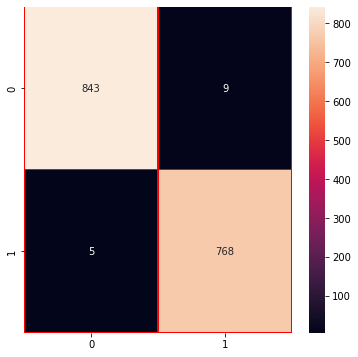

In [57]:
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()